In [1]:
# Imports
import pickle
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

(8000, 2) (80, 2)


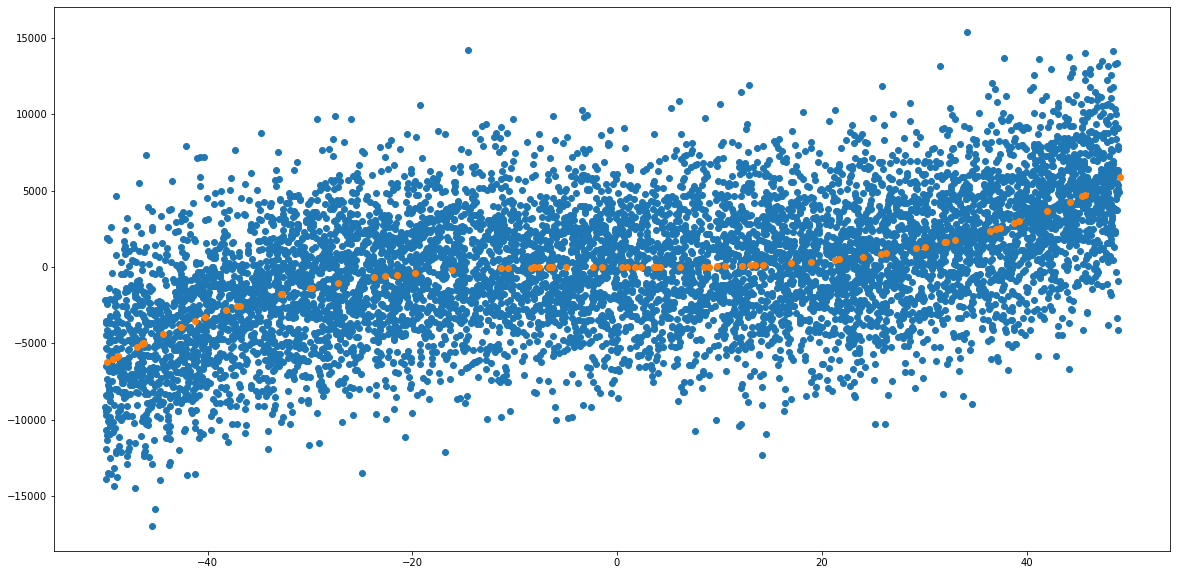

In [2]:
# Reading data from the files
TRAINING_PICKLE_FILE = open('./data/train.pkl', 'rb')
training_temp = pickle.load(TRAINING_PICKLE_FILE)
TESTING_PICKLE_FILE = open('./data/test.pkl', 'rb')
test = pickle.load(TESTING_PICKLE_FILE)
# Checking number of datapoints in train and test and plotting to get rough idea
print(training_temp.shape, test.shape)
plt.figure(figsize=(20,10))
plt.scatter(np.split(training_temp, 2, axis = 1)[0], np.split(training_temp, 2, axis = 1)[1])
plt.scatter(np.split(test, 2, axis = 1)[0], np.split(test, 2, axis = 1)[1])

In [3]:
# Definitions
MAX_ORDER = 21
MIN_ORDER = 1
NUM_TRAIN_SETS = 10
NUM_DATA_POINTS = training_temp.shape[0]
NUM_DATA_TEST = int(NUM_DATA_POINTS / NUM_TRAIN_SETS)

In [4]:
# Splitting the training dataset and sorting the test data
np.random.shuffle(training_temp)
test = np.sort(test, axis = 0)
training = []
for i in range(NUM_TRAIN_SETS):
    training.append(training_temp[NUM_DATA_TEST*i : NUM_DATA_TEST*(i+1)])

In [5]:
# Training the polynomial models
models = [[]]
polies = [[]]
for order in range(MIN_ORDER, MAX_ORDER):
    models.append([])
    polies.append([])
    
    for train_set in range(NUM_TRAIN_SETS):
        poly = PolynomialFeatures(order)
        x_train = np.split(training[train_set], 2, axis = 1)[0]
        x_train = poly.fit_transform(x_train)
        regmodel = LinearRegression().fit(x_train, np.split(training[train_set],2, axis = 1)[1])
        models[order].append(regmodel)
        polies[order].append(poly)
    
# Obtain predictions for each model with the test set
pred = [[]]
for order in range(MIN_ORDER, MAX_ORDER):
    pred.append([])
    for train_set in range(NUM_TRAIN_SETS):
        x_test = np.split(test, 2, axis = 1)[0]
        x_test = polies[order][train_set].transform(x_test)
        pred[order].append(models[order][train_set].predict(x_test))

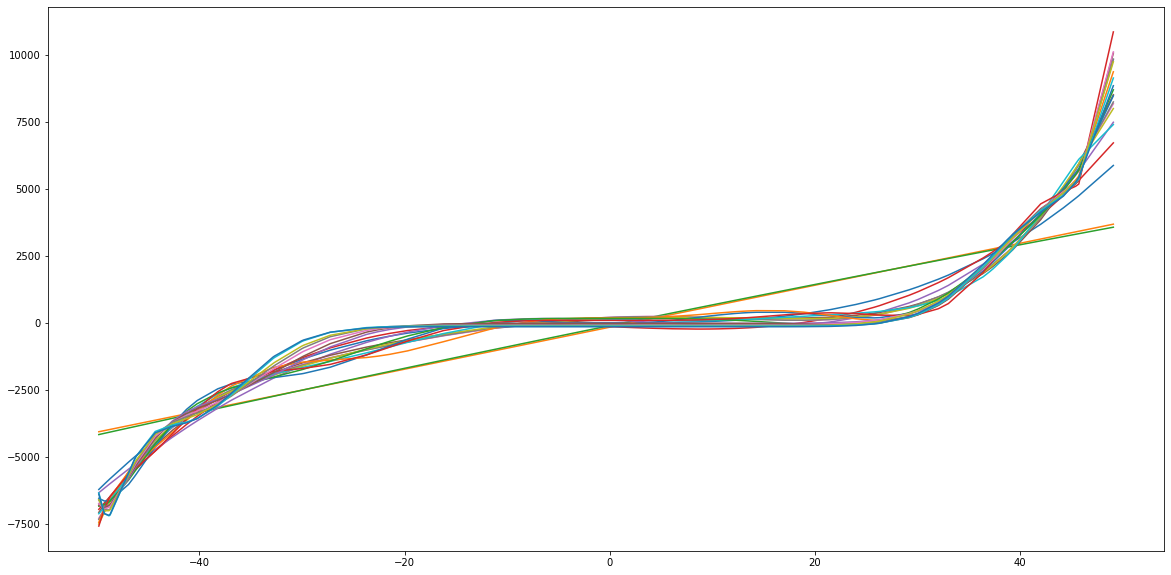

In [6]:
# Plotting one of every polynomial class
plt.figure(figsize=(20,10))
plt.plot(np.split(test, 2, axis = 1)[0], np.split(test, 2, axis = 1)[1])
for order in range(MIN_ORDER, MAX_ORDER):
    for train_set in range(1):
        plt.plot(np.split(test, 2, axis = 1)[0], pred[order][train_set])

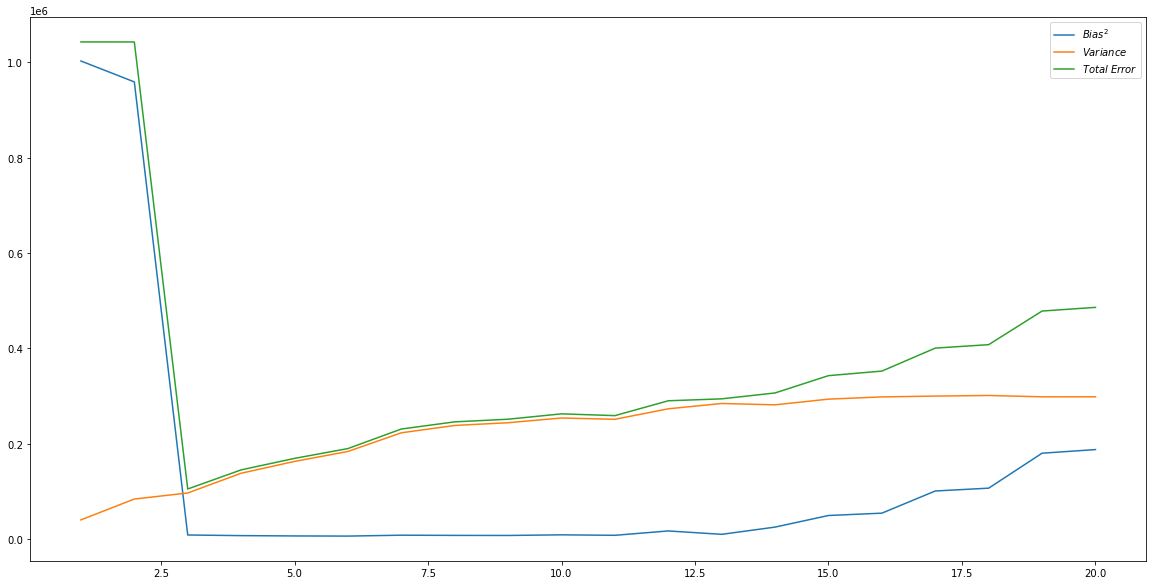

In [7]:
# Lists to hold our squared bias, variance, MSE and IRE
squared_bias = []
variance = []
mean_squared_error = []
irreducible_error = []
np.set_printoptions(suppress=True)
average_pred = [[]]

# Calculating average predictions (expectation)
for order in range(MIN_ORDER, MAX_ORDER):
    av_pred = np.mean(pred[order], axis = 0)
    average_pred.append(av_pred)

    
# Finding bias, variance and MSE for every order
for order in range(MIN_ORDER, MAX_ORDER):
    # Appended values
    var = 0
    bias = np.mean((average_pred[order] - np.split(test, 2, axis = 1)[1])**2)
    mse = 0
    
    # Finding variance and MSE 
    for train_set in range(NUM_TRAIN_SETS):
        test_var = np.mean((average_pred[order] - pred[order][train_set])**2)
        test_mse = np.mean((pred[order][train_set] - np.split(test, 2, axis = 1)[1])**2)

        var += test_var
        mse += test_mse
    
    var /= NUM_TRAIN_SETS
    mse /= NUM_TRAIN_SETS
    
    squared_bias.append(bias)
    variance.append(var)
    mean_squared_error.append(mse)
    irreducible_error.append(mse - bias - var)

x = [i for i in range(MIN_ORDER, MAX_ORDER)]
plt.figure(figsize=(20,10))
plt.plot(x, squared_bias, label="$Bias^2$")
plt.plot(x, variance, label="$Variance$")
plt.plot(x, mean_squared_error, label="$Total\ Error$")
plt.legend()